## `Ridge Regression Algorithm`

**Ridge Regression** is a regularized version of Linear Regression used to improve model performance when overfitting or multicollinearity is present.

It works by adding a penalty to large coefficients, which forces the model to keep weights small and balanced.

### Why Ridge Regression is used:
- To reduce overfitting
- To handle multicollinearity between features
- To prevent very large coefficient values

### Key Idea:
Ridge Regression does not remove features but reduces their influence by shrinking coefficients.

### Simple Definition:
Ridge Regression is a linear regression algorithm that adds a penalty to large weights to make the model more stable and generalizable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = df.drop("medv", axis=1)
y = df['medv']

In [4]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [8]:
ridge_regressor = Ridge()

In [9]:
ridge_regressor

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [11]:
parameters = {'alpha' : [1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCV = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgeCV.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [12]:
print(ridgeCV.best_params_)

{'alpha': 10}


In [13]:
print(ridgeCV.best_score_)

-25.80722882229147


In [15]:
ridge_pred = ridgeCV.predict(X_test)

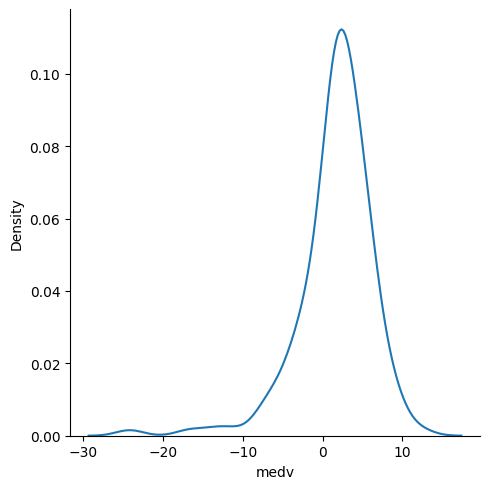

In [ ]:
import seaborn as sns
sns.displot(ridge_pred - y_test, kind='kde')

In [19]:
from sklearn.metrics import r2_score

In [20]:
score = r2_score(ridge_pred, y_test)

In [21]:
score

0.6249624625143056

### `Lasso Regression`

In [28]:
from sklearn.linear_model import Lasso

In [29]:
lasso = Lasso()
lasso

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [30]:
parameters = {'alpha' : [1,2,5,10,20,30,40,50,60,70,80,90]}
lassoCV = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lassoCV.fit(X_train, y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [31]:
print(lassoCV.best_params_)
print(lassoCV.best_score_)

{'alpha': 1}
-31.153603752119004


In [34]:
lasso_pred = lassoCV.predict(X_test)

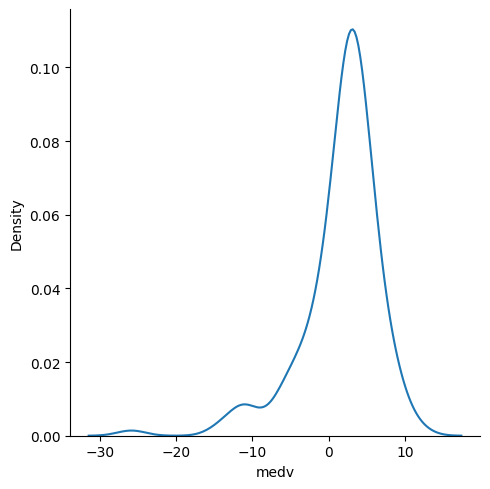

In [35]:
sns.displot(lasso_pred - y_test, kind='kde')

In [36]:
score = r2_score(lasso_pred, y_test)
score

0.33794412048869915